In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data


In [ ]:
type(data)

In [15]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
#This normalises the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971962e+07,1.971962e+07,False,NaN,1,NaN,NaN,None,2024-07-07T03:25:00.000Z,57978.859401,2.020013e+10,-57.5138,-0.565858,2.713728,-4.519831,-18.250618,-7.449224,-16.236916,1.143321e+12,53.8078,1.217556e+12,None,2024-07-07T03:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198
1,1027,Ethereum,ETH,ethereum,9121,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202008e+08,1.202008e+08,True,NaN,2,NaN,NaN,None,2024-07-07T03:24:00.000Z,3046.959277,1.095776e+10,-57.1494,-0.772532,2.174578,-9.367374,-19.869614,0.785940,-10.737882,3.662468e+11,17.2366,3.662468e+11,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198
2,825,Tether USDt,USDT,tether,91093,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122238e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-07T03:24:00.000Z,1.000458,4.239827e+10,-51.5385,0.033536,0.052032,0.212331,0.058546,0.056985,0.045923,1.122752e+11,5.2840,1.161300e+11,None,2024-07-07T03:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 13:02:53.001198
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475828e+08,1.475828e+08,False,NaN,4,NaN,NaN,None,2024-07-07T03:24:00.000Z,519.028282,1.595118e+09,-31.5663,-0.835369,3.221338,-8.738319,-26.183240,-10.940003,-10.392904,7.659962e+10,3.6050,7.659962e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.635506e+08,5.796884e+08,True,NaN,5,NaN,NaN,None,2024-07-07T03:24:00.000Z,141.179088,2.029201e+09,-46.7150,-1.135939,4.790072,1.654905,-16.883858,-5.086186,-19.901506,6.544365e+10,3.0800,8.183987e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.372063e+10,3.372063e+10,False,NaN,6,NaN,NaN,None,2024-07-07T03:24:00.000Z,1.000186,3.461742e+09,-61.2683,0.018788,0.025387,0.036309,0.008199,0.024404,0.020238,3.372692e+10,1.5873,3.372692e+10,None,2024-07-07T03:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 13:02:53.001198
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-07T03:25:00.000Z,0.444382,6.797657e+08,-56.4130,-0.726999,3.943675,-5.579250,-14.834460,-15.272739,-24.691082,2.476231e+10,1.1654,4.443817e+10,None,2024-07-07T03:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506053e+09,5.108638e+09,True,NaN,8,3.414167e+09,2.553310e+10,None,2024-07-07T03:24:00.000Z,7.478574,3.372568e+08,-43.4112,-0.602420,2.240918,-1.879630,-1.104739,31.593401,37.986662,1.874171e+10,0.8820,3.820533e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-e

In [40]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

    #Extract data to CSV
    if not os.path.isfile(r"C:\Users\Richard\Downloads\Python Project\Crypto Project.csv"):
        df.to_csv(r"C:\Users\Richard\Downloads\Python Project\Crypto Project.csv", header = 'column_names')
    else:    
        df.to_csv(r"C:\Users\Richard\Downloads\Python Project\Crypto Project.csv", mode='a', header=False)

        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [35]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df72 = pd.read(r"C:\Users\Richard\Downloads\Python Project\Crypto Project.csv")
df72

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971962e+07,1.971962e+07,False,NaN,1,NaN,NaN,None,2024-07-07T03:25:00.000Z,57978.859401,2.020013e+10,-57.5138,-0.565858,2.713728,-4.519831,-18.250618,-7.449224,-16.236916,1.143321e+12,53.8078,1.217556e+12,None,2024-07-07T03:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
1,1027,Ethereum,ETH,ethereum,9121,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202008e+08,1.202008e+08,True,NaN,2,NaN,NaN,None,2024-07-07T03:24:00.000Z,3046.959277,1.095776e+10,-57.1494,-0.772532,2.174578,-9.367374,-19.869614,0.785940,-10.737882,3.662468e+11,17.2366,3.662468e+11,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
2,825,Tether USDt,USDT,tether,91093,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122238e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-07T03:24:00.000Z,1.000458,4.239827e+10,-51.5385,0.033536,0.052032,0.212331,0.058546,0.056985,0.045923,1.122752e+11,5.2840,1.161300e+11,None,2024-07-07T03:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 13:02:53.001198,NaT
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475828e+08,1.475828e+08,False,NaN,4,NaN,NaN,None,2024-07-07T03:24:00.000Z,519.028282,1.595118e+09,-31.5663,-0.835369,3.221338,-8.738319,-26.183240,-10.940003,-10.392904,7.659962e+10,3.6050,7.659962e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.635506e+08,5.796884e+08,True,NaN,5,NaN,NaN,None,2024-07-07T03:24:00.000Z,141.179088,2.029201e+09,-46.7150,-1.135939,4.790072,1.654905,-16.883858,-5.086186,-19.901506,6.544365e+10,3.0800,8.183987e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.372063e+10,3.372063e+10,False,NaN,6,NaN,NaN,None,2024-07-07T03:24:00.000Z,1.000186,3.461742e+09,-61.2683,0.018788,0.025387,0.036309,0.008199,0.024404,0.020238,3.372692e+10,1.5873,3.372692e+10,None,2024-07-07T03:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 13:02:53.001198,NaT
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-07T03:25:00.000Z,0.444382,6.797657e+08,-56.4130,-0.726999,3.943675,-5.579250,-14.834460,-15.272739,-24.691082,2.476231e+10,1.1654,4.443817e+10,None,2024-07-07T03:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506053e+09,5.108638e+09,True,NaN,8,3.414167e+09,2.553310e+10,None,2024-07-07T03:24:00.000Z,7.478574,3.372568e+08,-43.4112,-0.602420,2.240918,-1.879630,-1.104739,31.593401,37.986662,1.874171e+10,0.8820,3.820533e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00

In [ ]:
pd.set_options['display.float_format', lambda x: '%.5f' % x)

In [38]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971962e+07,1.971962e+07,False,NaN,1,NaN,NaN,None,2024-07-07T03:25:00.000Z,57978.859401,2.020013e+10,-57.5138,-0.565858,2.713728,-4.519831,-18.250618,-7.449224,-16.236916,1.143321e+12,53.8078,1.217556e+12,None,2024-07-07T03:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
1,1027,Ethereum,ETH,ethereum,9121,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202008e+08,1.202008e+08,True,NaN,2,NaN,NaN,None,2024-07-07T03:24:00.000Z,3046.959277,1.095776e+10,-57.1494,-0.772532,2.174578,-9.367374,-19.869614,0.785940,-10.737882,3.662468e+11,17.2366,3.662468e+11,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
2,825,Tether USDt,USDT,tether,91093,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122238e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-07T03:24:00.000Z,1.000458,4.239827e+10,-51.5385,0.033536,0.052032,0.212331,0.058546,0.056985,0.045923,1.122752e+11,5.2840,1.161300e+11,None,2024-07-07T03:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 13:02:53.001198,NaT
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475828e+08,1.475828e+08,False,NaN,4,NaN,NaN,None,2024-07-07T03:24:00.000Z,519.028282,1.595118e+09,-31.5663,-0.835369,3.221338,-8.738319,-26.183240,-10.940003,-10.392904,7.659962e+10,3.6050,7.659962e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.635506e+08,5.796884e+08,True,NaN,5,NaN,NaN,None,2024-07-07T03:24:00.000Z,141.179088,2.029201e+09,-46.7150,-1.135939,4.790072,1.654905,-16.883858,-5.086186,-19.901506,6.544365e+10,3.0800,8.183987e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.372063e+10,3.372063e+10,False,NaN,6,NaN,NaN,None,2024-07-07T03:24:00.000Z,1.000186,3.461742e+09,-61.2683,0.018788,0.025387,0.036309,0.008199,0.024404,0.020238,3.372692e+10,1.5873,3.372692e+10,None,2024-07-07T03:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 13:02:53.001198,NaT
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-07T03:25:00.000Z,0.444382,6.797657e+08,-56.4130,-0.726999,3.943675,-5.579250,-14.834460,-15.272739,-24.691082,2.476231e+10,1.1654,4.443817e+10,None,2024-07-07T03:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506053e+09,5.108638e+09,True,NaN,8,3.414167e+09,2.553310e+10,None,2024-07-07T03:24:00.000Z,7.478574,3.372568e+08,-43.4112,-0.602420,2.240918,-1.879630,-1.104739,31.593401,37.986662,1.874171e+10,0.8820,3.820533e+10,None,2024-07-07T03:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 13:02:53.001198,NaT
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00

In [50]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.414770,2.935699,-4.556377,-18.205983,-7.532344,-16.347967
Ethereum,-0.466942,2.464852,-9.336237,-19.841015,0.732929,-10.820895
Tether USDt,0.012134,0.019820,0.185980,0.045364,0.038904,0.029621
BNB,-0.493139,3.522211,-8.608674,-26.244016,-10.900806,-10.436804
Solana,-0.624683,5.385944,2.114914,-16.758876,-4.771127,-19.710357
USDC,0.007664,0.003638,0.019666,0.004338,0.015736,0.018003
XRP,-0.548190,4.126483,-5.502752,-14.763550,-15.241336,-24.727992
Toncoin,-0.319537,2.599207,-1.815273,-1.386032,31.507910,38.031268
Dogecoin,-0.171355,5.930470,-7.599647,-30.474524,-26.155129,-43.300500


In [54]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.414770
             quote.USD.percent_change_24h     2.935699
             quote.USD.percent_change_7d     -4.556377
             quote.USD.percent_change_30d   -18.205983
             quote.USD.percent_change_60d    -7.532344
             quote.USD.percent_change_90d   -16.347967
Ethereum     quote.USD.percent_change_1h     -0.466942
             quote.USD.percent_change_24h     2.464852
             quote.USD.percent_change_7d     -9.336237
             quote.USD.percent_change_30d   -19.841015
             quote.USD.percent_change_60d     0.732929
             quote.USD.percent_change_90d   -10.820895
Tether USDt  quote.USD.percent_change_1h      0.012134
             quote.USD.percent_change_24h     0.019820
             quote.USD.percent_change_7d      0.185980
             quote.USD.percent_change_30d     0.045364
             quote.USD.percent_change_60d     0.038904
             quote.USD.

In [56]:
type(df4)

pandas.core.series.Series

In [96]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.414770
            quote.USD.percent_change_24h   2.935699
            quote.USD.percent_change_7d   -4.556377
            quote.USD.percent_change_30d -18.205983
            quote.USD.percent_change_60d  -7.532344
            quote.USD.percent_change_90d -16.347967
Ethereum    quote.USD.percent_change_1h   -0.466942
            quote.USD.percent_change_24h   2.464852
            quote.USD.percent_change_7d   -9.336237
            quote.USD.percent_change_30d -19.841015
            quote.USD.percent_change_60d   0.732929
            quote.USD.percent_change_90d -10.820895
Tether USDt quote.USD.percent_change_1h    0.012134
            quote.USD.percent_change_24h   0.019820
            quote.USD.percent_change_7d    0.185980
            quote.USD.percent_change_30d   0.045364
            quote.USD.percent_change_60d   0.038904
            quote.USD.percent_change_90d   0.029621
BNB         quote.USD.percent_change_1h   -0.493139
            quote.USD.percent_change_24h   3.522211
            quote.USD.percent_change_7d   -8.608674
            quote.USD.percent_change_30d -26.244016
            quote.USD.percent_change_60d -10.900806
            quote.USD.percent_change_90d -10.436804
Solana      quote.USD.percent_change_1h   -0.624683
            quote.USD.percent_change_24h   5.385944
            quote.USD.percent_change_7d    2.114914
            quote.USD.percent_change_30d -16.758876
            quote.USD.percent_change_60d  -4.771127
            quote.USD.percent_change_90d -19.710357
USDC        quote.USD.percent_change_1h    0.007664
            quote.USD.percent_change_24h   0.003638
            quote.USD.percent_change_7d    0.019666
            quote.USD.percent_change_30d   0.004338
            quote.USD.percent_change_60d   0.015736
            quote.USD.percent_change_90d   0.018003
XRP         quote.USD.percent_change_1h   -0.548190
            quote.USD.percent_change_24h   4.126483
            quote.USD.percent_change_7d   -5.502752
            quote.USD.percent_change_30d -14.763550
            quote.USD.percent_change_60d -15.241336
            quote.USD.percent_change_90d -24.727992
Toncoin     quote.USD.percent_change_1h   -0.319537
            quote.USD.percent_change_24h   2.599207
            quote.USD.percent_change_7d   -1.815273
            quote.USD.percent_change_30d  -1.386032
            quote.USD.percent_change_60d  31.507910
            quote.USD.percent_change_90d  38.031268
Dogecoin    quote.USD.percent_change_1h   -0.171355
            quote.USD.percent_change_24h   5.930470
            quote.USD.percent_change_7d   -7.599647
            quote.USD.percent_change_30d -30.474524
            quote.USD.percent_change_60d -26.155129
            quote.USD.percent_change_90d -43.300500
Cardano     quote.USD.percent_change_1h   -0.250318
            quote.USD.percent_change_24h   5.435553
            quote.USD.percent_change_7d   -3.041390
            quote.USD.percent_change_30d -19.415819
            quote.USD.percent_change_60d -16.811211
            quote.USD.percent_change_90d -36.619382
TRON        quote.USD.percent_change_1h   -0.100890
            quote.USD.percent_change_24h   2.332877
            quote.USD.percent_change_7d    3.781683
            quote.USD.percent_change_30d  14.208489
            quote.USD.percent_change_60d   7.281554
            quote.USD.percent_change_90d   7.590924
Avalanche   quote.USD.percent_change_1h   -0.269926
            quote.USD.percent_change_24h   6.637305
            quote.USD.percent_change_7d   -3.400870
            quote.USD.percent_change_30d -25.213611
            quote.USD.percent_change_60d -24.275757
            quote.USD.percent_change_90d -45.249353
Shiba Inu   quote.USD.percent_change_1h   -0.734288
            quote.USD.percent_change_24h  13.593083
            quote.USD.percent_change_7d    1.439869
            quote.USD.percent_change_30d 

In [98]:
df5.count()

values    90
dtype: int64

In [108]:
#Need to set an index. Not ideal to pass a column as an index for this dataframe
#Create a range and pass that as the dataframe.


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.414770
1,Bitcoin,quote.USD.percent_change_24h,2.935699
2,Bitcoin,quote.USD.percent_change_7d,-4.556377
3,Bitcoin,quote.USD.percent_change_30d,-18.205983
4,Bitcoin,quote.USD.percent_change_60d,-7.532344
5,Bitcoin,quote.USD.percent_change_90d,-16.347967
6,Ethereum,quote.USD.percent_change_1h,-0.466942
7,Ethereum,quote.USD.percent_change_24h,2.464852
8,Ethereum,quote.USD.percent_change_7d,-9.336237
9,Ethereum,quote.USD.percent_change_30d,-19.841015


In [110]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.414770
1,Bitcoin,quote.USD.percent_change_24h,2.935699
2,Bitcoin,quote.USD.percent_change_7d,-4.556377
3,Bitcoin,quote.USD.percent_change_30d,-18.205983
4,Bitcoin,quote.USD.percent_change_60d,-7.532344
5,Bitcoin,quote.USD.percent_change_90d,-16.347967
6,Ethereum,quote.USD.percent_change_1h,-0.466942
7,Ethereum,quote.USD.percent_change_24h,2.464852
8,Ethereum,quote.USD.percent_change_7d,-9.336237
9,Ethereum,quote.USD.percent_change_30d,-19.841015


In [116]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.414770
1,Bitcoin,24h,2.935699
2,Bitcoin,7d,-4.556377
3,Bitcoin,30d,-18.205983
4,Bitcoin,60d,-7.532344
5,Bitcoin,90d,-16.347967
6,Ethereum,quote.USD.percent_change_1h,-0.466942
7,Ethereum,24h,2.464852
8,Ethereum,7d,-9.336237
9,Ethereum,30d,-19.841015


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

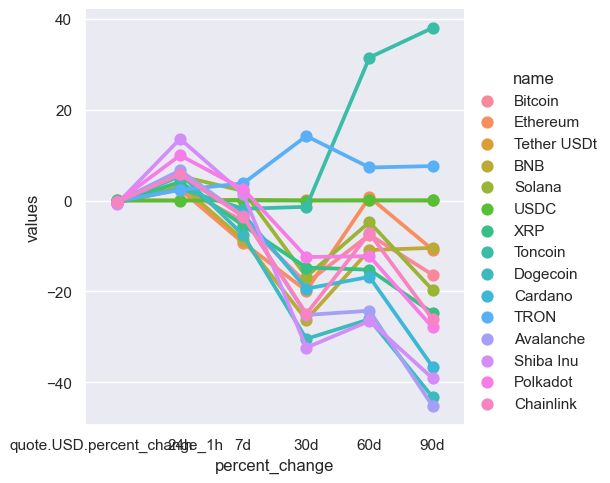

In [140]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [142]:
# Create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,57978.859401,2024-07-07 13:02:53.001198
0,Bitcoin,58003.637553,NaT
0,Bitcoin,57983.387501,NaT
0,Bitcoin,57983.387501,NaT
0,Bitcoin,58022.078443,NaT
0,Bitcoin,58024.224644,NaT
0,Bitcoin,58024.224644,NaT
0,Bitcoin,58024.224644,NaT
0,Bitcoin,58022.778772,NaT
0,Bitcoin,57999.477284,NaT


C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

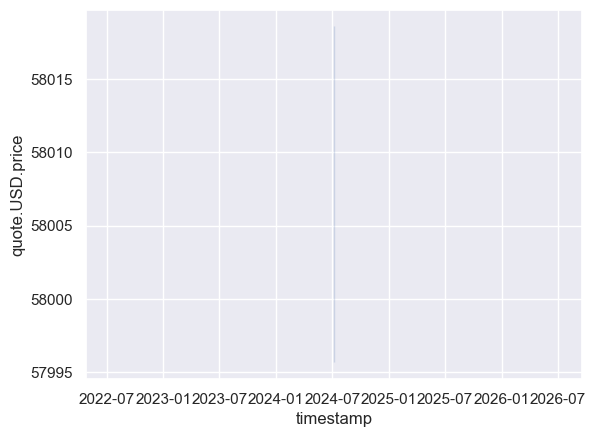

In [136]:
# Convert inf to NaN
df10.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting with Seaborn
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)